In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv('SampleSuperstore.csv')

# Displaying Our Data


In [7]:
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Let us check the rows and columns in our Data: 

In [9]:
df.shape

(9994, 13)

# Let us check whether there are null values or not so we can drop them:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Let's check measures of central tendency to figure out outliers:

In [13]:
df.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [14]:
print(df['Sales'].describe())

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


In [19]:
Quantity = df.groupby(["Sales"]).sum().sort_values("Quantity", ascending=True)
Quantity

,Postal Code,Quantity,Discount,Profit
Sales,,,,
0.444,77095,1,0.8,-1.1100
7.580,98103,1,0.0,2.9562
28.990,22304,1,0.0,8.4071
134.990,21215,1,0.0,36.4473
29.290,94122,1,0.0,9.6657
...,...,...,...,...
15.552,2073774,117,7.8,210.3408
19.440,2342378,117,0.0,364.1112
12.960,3372346,120,0.4,344.2176


In [21]:
Category = df.groupby(["Category"]).sum().sort_values("Profit", ascending=True)
Category

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,118196026,741999.7953,8028,368.89,18451.2728
Office Supplies,330772872,719047.0320,22906,947.80,122490.8008
Technology,102603754,836154.0330,6939,244.40,145454.9481


In [23]:
mean_of_profit = df.groupby('Category').agg({'Profit': ['mean', 'min', 'max']})
print(mean_of_profit)

                    Profit                     
                      mean        min       max
Category                                       
Furniture         8.699327 -1862.3124  1013.127
Office Supplies  20.327050 -3701.8928  4946.370
Technology       78.752002 -6599.9780  8399.976


In [24]:
# Use 3 decimal places in output display
pd.set_option("display.precision", 3)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

In [25]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [26]:
Category = df.groupby(["Category", "Sub-Category"]).sum().sort_values("Profit", ascending=True)
Category

Postal Code       Sales  Quantity  Discount     Profit
Category        Sub-Category                                                        
Furniture       Tables           18607828  206965.532      1241     83.35 -17725.481
                Bookcases        12771539  114879.996       868     48.14  -3472.556
Office Supplies Supplies         10633558   46673.538       647     14.60  -1189.099
                Fasteners        12506063    3024.280       914     17.80    949.518
Technology      Machines          6364668  189238.631       440     35.20   3384.757
Office Supplies Labels           19552985   12486.312      1400     25.00   5546.254
                Art              43329658   27118.792      3000     59.60   6527.787
                Envelopes        13325731   16476.402       906     20.40   6964.177
Furniture       Furnishings      51880430   91705.164      3563    132.40  13059.144
Office Supplies Appliances       25250538  107532.161      1729     77.60  18138.005
                Storage          46248720  223843.608      3158     63.20  21278.826
Furniture       Chairs           34936229  328449.103      2356    105.00  26590.166
Office Supplies Binders          83626398  203412.733      5974    567.00  30221.763
                Paper            76299221   78479.206      5178    102.60  34053.569
Technology      Accessories      44468434  167380.318      2976     60.80  41936.636
                Phones           47897175  330007.054      3289    137.40  44515.731
                Copiers           3873477  149528.030       234     11.00  55617.825

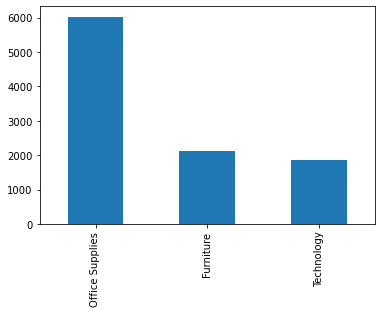

In [28]:
df["Category"].value_counts().plot(kind="bar")
plt.show()

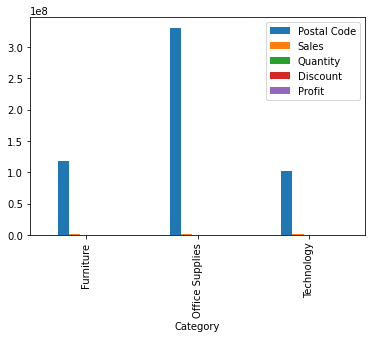

In [29]:
df.groupby(["Category"]).sum().sort_values("Profit", ascending=True).plot(kind="bar")
plt.show()

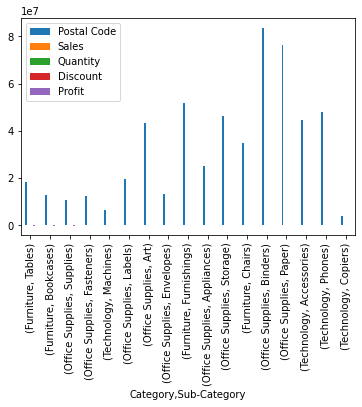

In [30]:
Category.plot(kind='bar')
plt.show()

In [32]:
df = df.drop(['Postal Code'], axis=1)

In [33]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.960,2,0.00,41.914
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.940,3,0.00,219.582
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.00,6.871
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.577,5,0.45,-383.031
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2,0.20,2.516


In [34]:
Category = df.groupby(["Category", "Sub-Category"]).sum().sort_values("Profit", ascending=True)
Category

Sales  Quantity  Discount     Profit
Category        Sub-Category                                           
Furniture       Tables        206965.532      1241     83.35 -17725.481
                Bookcases     114879.996       868     48.14  -3472.556
Office Supplies Supplies       46673.538       647     14.60  -1189.099
                Fasteners       3024.280       914     17.80    949.518
Technology      Machines      189238.631       440     35.20   3384.757
Office Supplies Labels         12486.312      1400     25.00   5546.254
                Art            27118.792      3000     59.60   6527.787
                Envelopes      16476.402       906     20.40   6964.177
Furniture       Furnishings    91705.164      3563    132.40  13059.144
Office Supplies Appliances    107532.161      1729     77.60  18138.005
                Storage       223843.608      3158     63.20  21278.826
Furniture       Chairs        328449.103      2356    105.00  26590.166
Office Supplies Binders       203412.733      5974    567.00  30221.763
                Paper          78479.206      5178    102.60  34053.569
Technology      Accessories   167380.318      2976     60.80  41936.636
                Phones        330007.054      3289    137.40  44515.731
                Copiers       149528.030       234     11.00  55617.825

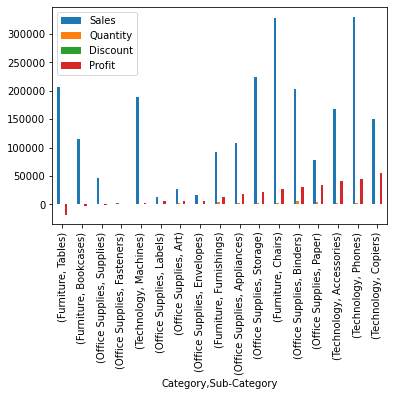

In [35]:
Category.plot(kind='bar')
plt.show()

In [61]:
Country = df.groupby(["Country"]).sum().sort_values("Profit", ascending=True)
Category

Sales  Quantity  Discount     Profit
Country       State        City                                                    
United States Pennsylvania Philadelphia   109077.013      1981    175.50 -13837.767
              Texas        Houston         64504.760      1466    143.14 -10153.548
                           San Antonio     21843.528       247     22.60  -7299.050
              Ohio         Lancaster        8202.625       121      9.70  -7149.618
              Illinois     Chicago         48539.541      1132    120.50  -6654.569
...                                              ...       ...       ...        ...
              Michigan     Detroit         42446.944       441      0.80  13181.791
              California   San Francisco  112669.092      1935     34.00  17507.385
              Washington   Seattle        119540.742      1590     27.80  29156.097
              California   Los Angeles    175851.341      2879     55.50  30440.758
              New York     New York City  256368.161      3417     51.40  62036.984

[604 rows x 4 columns]

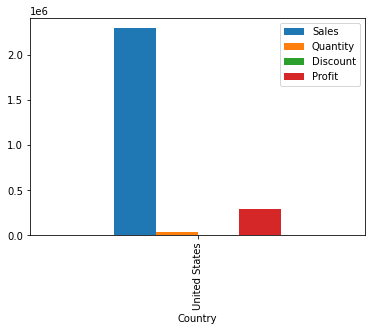

In [62]:
Country.plot(kind='bar')
plt.show()

In [65]:
States = df.groupby(["State"]).sum().sort_values("Profit", ascending=True)
States

,Sales,Quantity,Discount,Profit
State,,,,
Texas,170188.046,3724,364.64,-25729.356
Ohio,78258.136,1759,152.40,-16971.377
Pennsylvania,116511.914,2153,192.90,-15559.960
Illinois,80166.101,1845,191.90,-12607.887
North Carolina,55603.164,983,70.60,-7490.912
...,...,...,...,...
Virginia,70636.720,893,0.00,18597.950
Michigan,76269.614,946,1.80,24463.188
Washington,138641.270,1883,32.40,33402.652


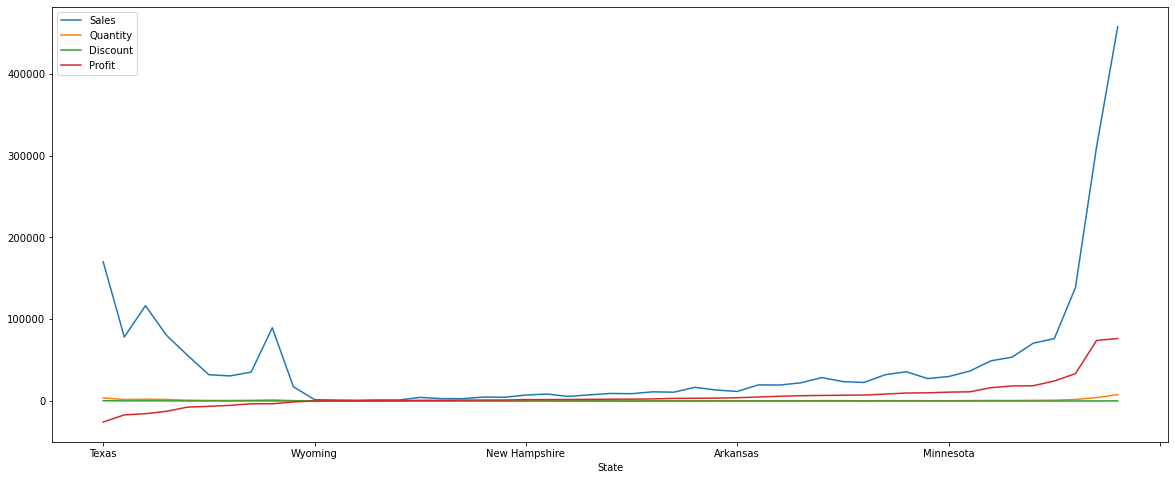

In [86]:
States.plot(kind='line', figsize=(20,8))
plt.show()

In [67]:
Cities = df.groupby(["City"]).sum().sort_values("Profit", ascending=True)
Cities

,Sales,Quantity,Discount,Profit
City,,,,
Philadelphia,109077.013,1981,175.50,-13837.767
Houston,64504.760,1466,143.14,-10153.548
San Antonio,21843.528,247,22.60,-7299.050
Lancaster,9891.464,171,14.50,-7239.068
Chicago,48539.541,1132,120.50,-6654.569
...,...,...,...,...
Detroit,42446.944,441,0.80,13181.791
San Francisco,112669.092,1935,34.00,17507.385
Seattle,119540.742,1590,27.80,29156.097


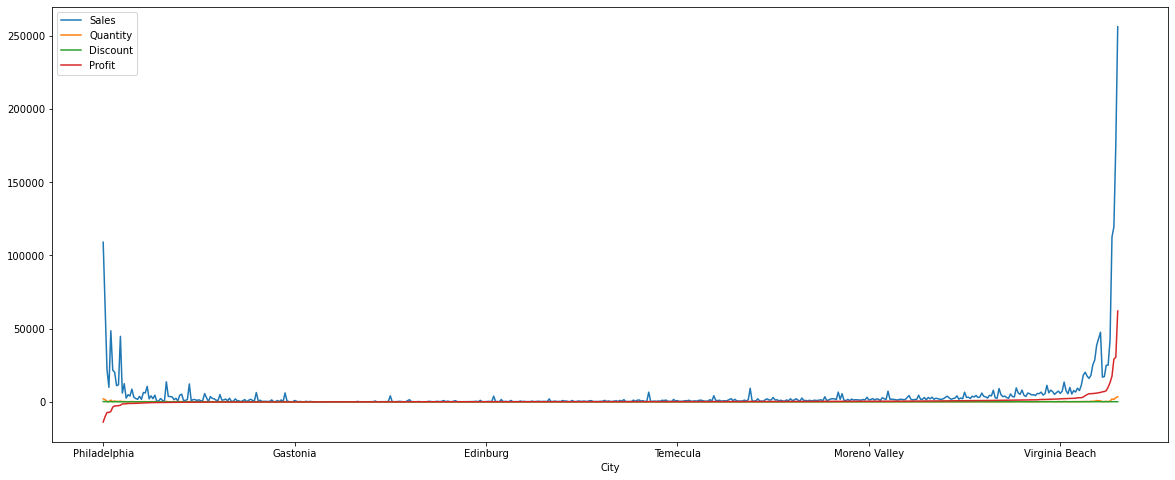

In [85]:
Cities.plot(kind='line', figsize=(20,8))
plt.show()

In [69]:
State_wise = df.groupby(["State","Category", "Sub-Category"]).sum().sort_values("Profit", ascending=True)
State_wise

,,,Sales,Quantity,Discount,Profit
State,Category,Sub-Category,,,,
Texas,Office Supplies,Binders,9042.676,626,122.4,-14705.074
Ohio,Technology,Machines,8978.238,39,5.6,-11770.945
Illinois,Office Supplies,Binders,4538.546,327,64.0,-7204.324
Texas,Office Supplies,Appliances,2407.814,159,37.6,-6147.223
North Carolina,Technology,Machines,12620.655,11,2.0,-5384.809
...,...,...,...,...,...,...
Michigan,Office Supplies,Binders,22821.970,192,0.0,11079.505
California,Technology,Accessories,37255.010,568,0.0,11095.656
New York,Office Supplies,Binders,32456.912,696,35.8,11096.026


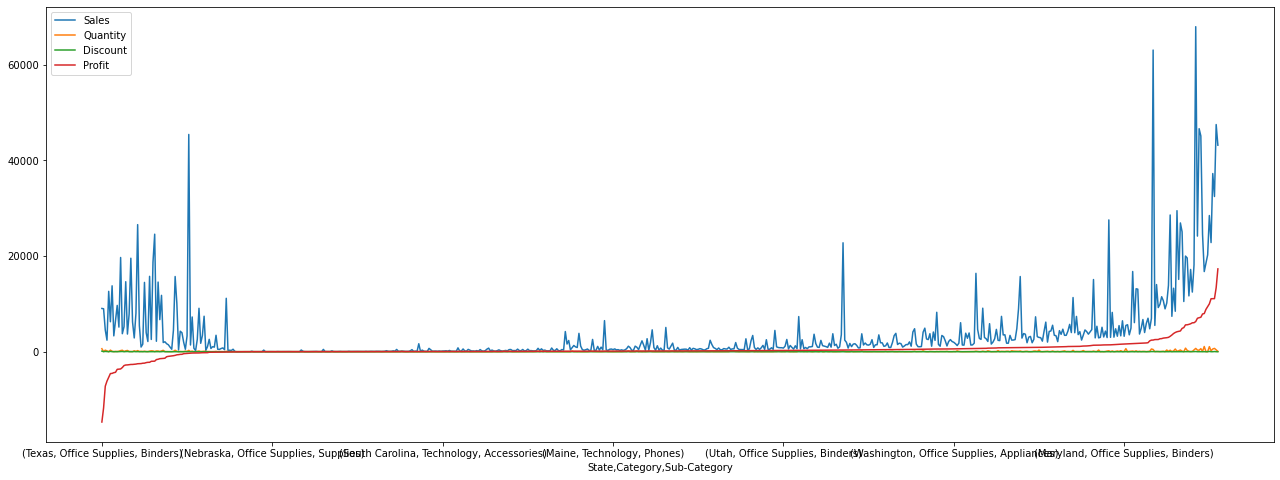

In [83]:
State_wise.plot(kind='line', figsize=(22,8))
plt.show()

In [75]:
products = df.groupby(["State" , "Category"]).sum().sort_values("Profit", ascending=True)
products

Sales  Quantity  Discount     Profit
State      Category                                                  
Texas      Office Supplies   44490.530      2299    240.80 -18584.643
Ohio       Technology        35675.992       384     34.60 -12649.940
Texas      Furniture         60593.292       766     85.44 -10436.142
Illinois   Furniture         28274.522       448     57.60  -9076.289
           Office Supplies   19907.906      1095    117.00  -8354.157
...                                ...       ...       ...        ...
Washington Technology        50536.710       352      8.40  15019.343
New York   Office Supplies   90020.042      2585     35.80  25994.083
California Technology       159271.082      1405     42.40  29470.037
           Office Supplies  142351.948      4566     55.20  37748.385
New York   Technology       127483.500       762      1.40  42186.786

[142 rows x 4 columns]

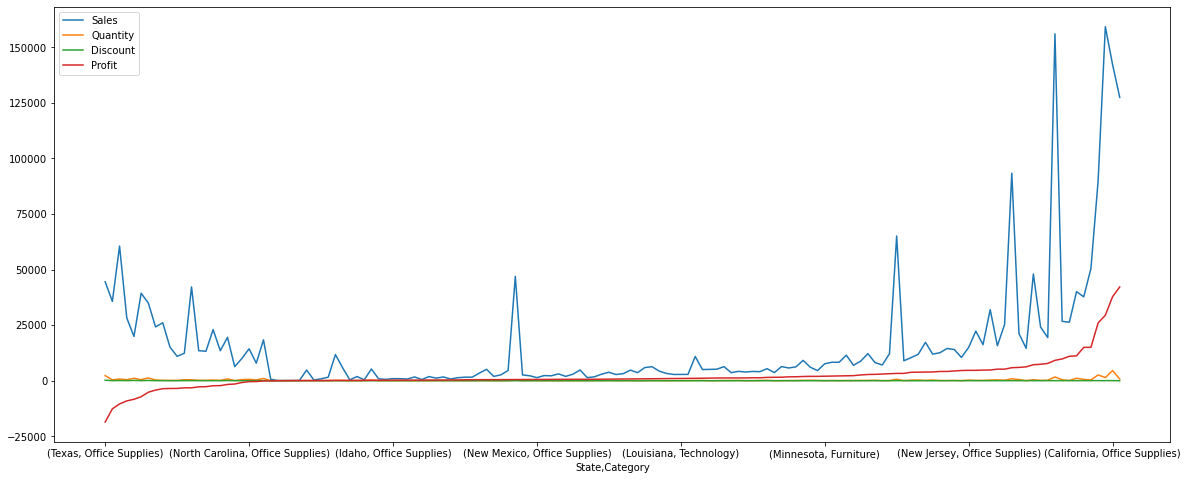

In [81]:
products.plot(kind='line' , figsize=(20,8))
plt.show()

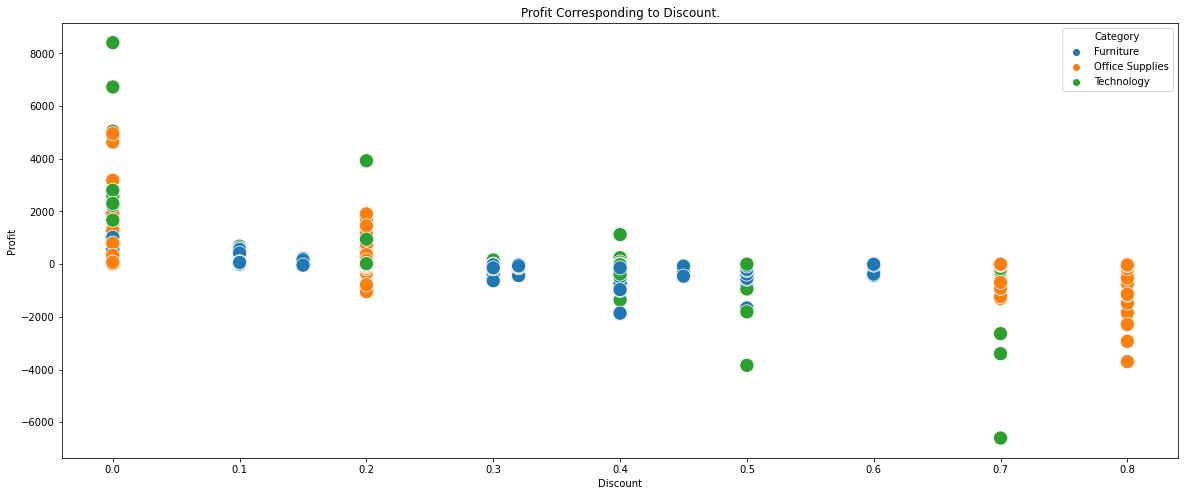

In [124]:
fig,ax = plt.subplots(figsize=(20,8))
def plot_disccat(ax):
    sns.scatterplot(x="Discount", y="Profit", data=df, hue="Category",ax=ax,s=200)
    ax.set_title('Profit Corresponding to Discount.')
Discount = plot_disccat(ax)
plt.show()


# Dashbooard:

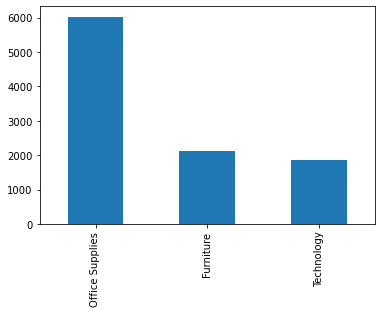

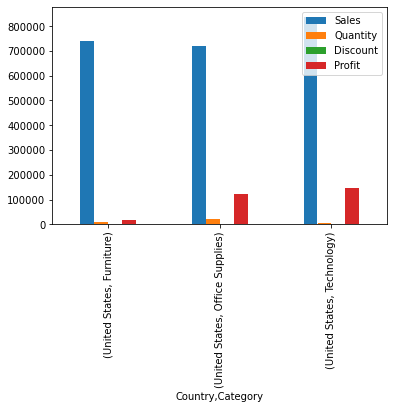

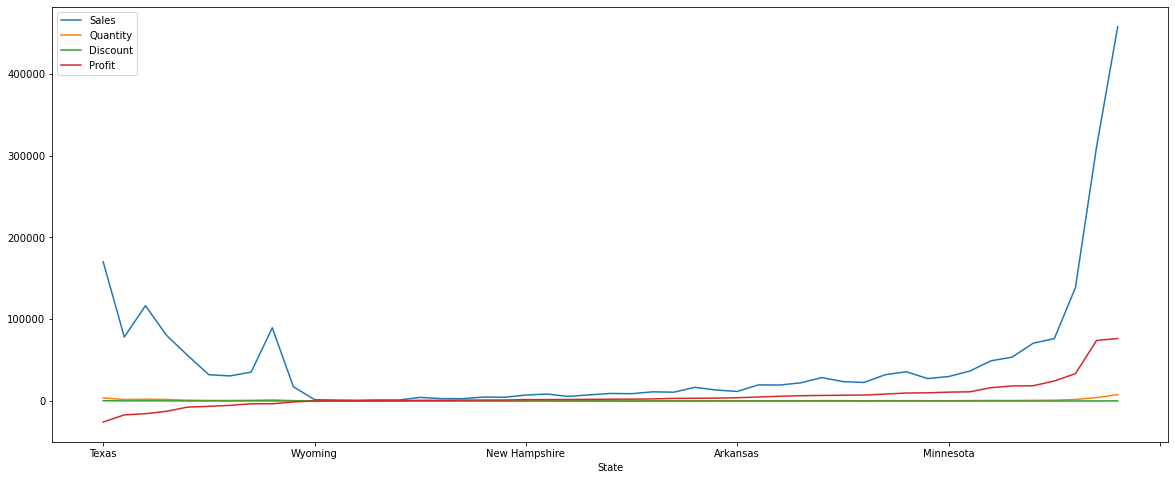

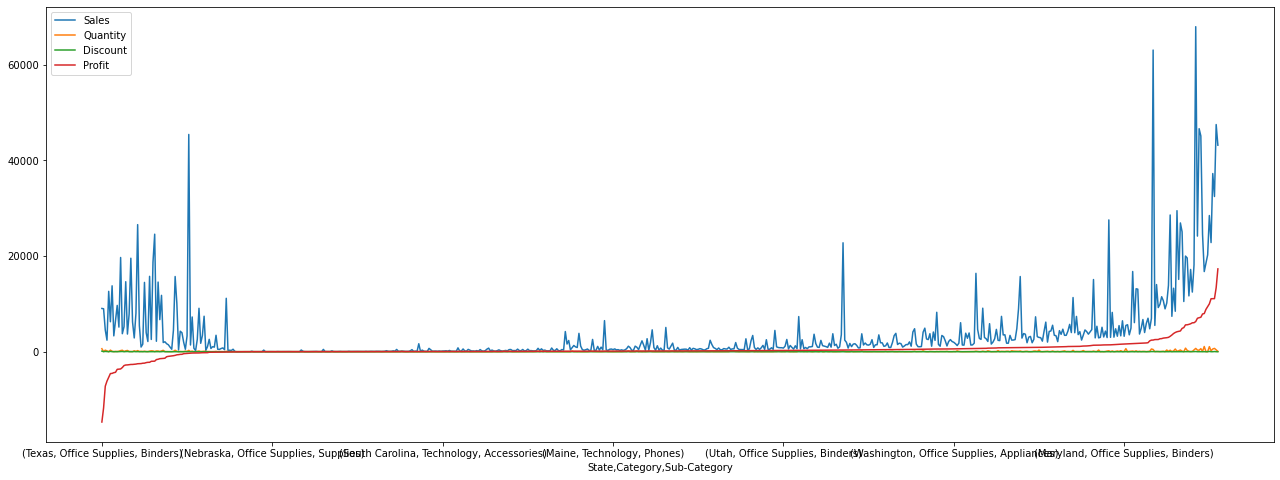

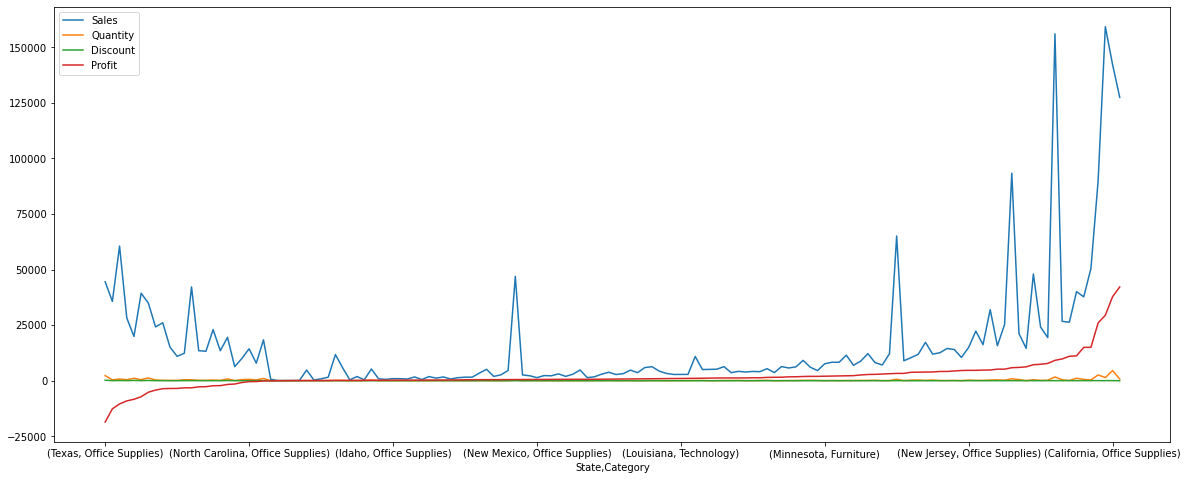

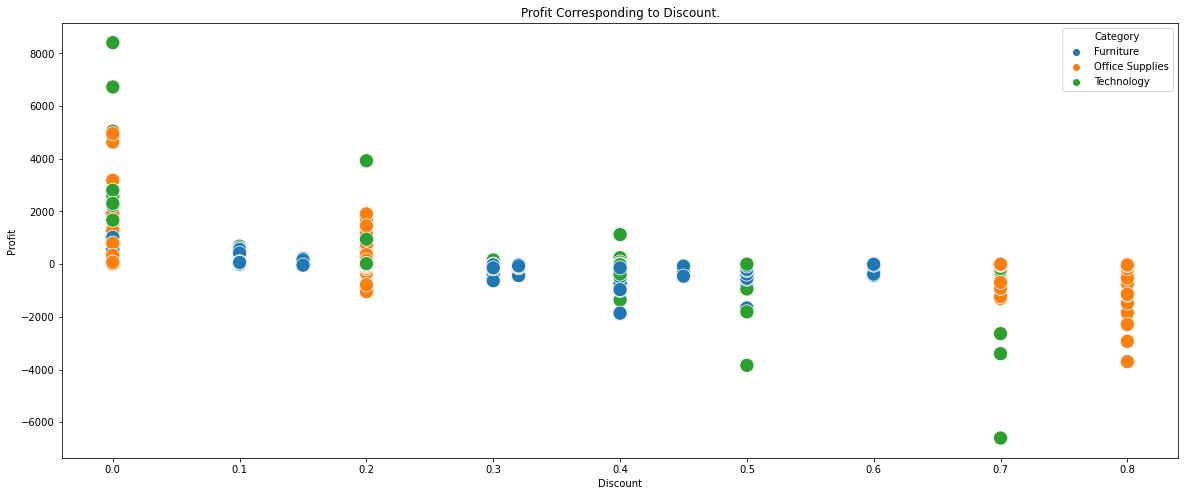

In [126]:
df["Category"].value_counts().plot(kind="bar")
plt.show()
Country.plot(kind='bar')
plt.show()
States.plot(kind='line', figsize=(20,8))
plt.show()
Cities = df.groupby(["City"]).sum().sort_values("Profit", ascending=True)
Cities
State_wise.plot(kind='line', figsize=(22,8))
plt.show()
products.plot(kind='line' , figsize=(20,8))
plt.show()
fig,ax = plt.subplots(figsize=(20,8))
def plot_disccat(ax):
    sns.scatterplot(x="Discount", y="Profit", data=df, hue="Category",ax=ax,s=200)
    ax.set_title('Profit Corresponding to Discount.')
Discount = plot_disccat(ax)
plt.show()

# Conclusions:
1) High Loss in Texas for Office Supplies recorded.

2) It is noted that giving more discount induced huge loss as well.